Here, we further process cleaned data to feed the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig_params={'legend.fontsize':18,
          'axes.labelsize': 18,
          'axes.titlesize':20,
          'xtick.labelsize':16,
          'ytick.labelsize':16,             
          'axes.facecolor':'#D9DDD1'}
plt.rcParams.update(fig_params)

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [2]:
df=pd.read_csv('./data/cleanData.csv')

In [3]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'grade_sqrt',
       'have_basement', 'if_renovated'],
      dtype='object')

In [4]:
X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month']]
y=df['price']
X_train_tmp, X_test_f, y_train_tmp, y_test_f=train_test_split(X,y,test_size=0.2,random_state=102)
X_train, X_cv, y_train, y_cv=train_test_split(X_train_tmp,y_train_tmp,test_size=0.25)

In [5]:
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_cv=scaler.transform(X_cv)
X_test_f=scaler.transform(X_test_f)

### Linear regression

In [6]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)
y_train_pred=linReg.predict(X_train)

y_cv_pred=linReg.predict(X_cv)

In [7]:
print('mean sq error training data : ',mean_squared_error(y_train,y_train_pred))
print('mean sq error cross-val data : ',mean_squared_error(y_cv,y_cv_pred))
print()
print('mean abs error training data : ',mean_absolute_error(y_train,y_train_pred))
print('mean abs error cross-val data : ',mean_absolute_error(y_cv,y_cv_pred))


mean sq error training data :  25458927303.16032
mean sq error cross-val data :  29420033739.712933

mean abs error training data :  109906.42908778244
mean abs error cross-val data :  113940.08381623948


In [8]:
mean_absolute_error(y_train,y_train_pred)-mean_absolute_error(y_cv,y_cv_pred)

-4033.6547284570406

Text(0, 0.5, 'Predicted')

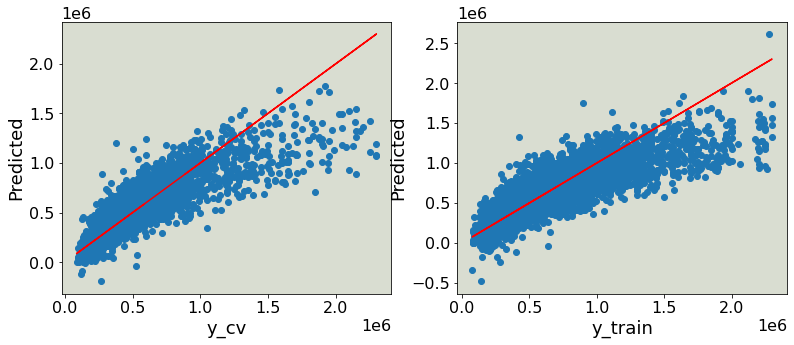

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')

### ANN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

/home/chaitanya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/chaitanya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/chaitanya/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/chaitanya/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

In [11]:
X_train.shape

(12886, 19)

In [12]:
model=Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(33,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.fit(x=X_train,y=y_train.values,validation_data=(X_cv,y_cv.values),batch_size=128,epochs=500)

Train on 12886 samples, validate on 4296 samples
Epoch 1/500
12886/12886 [==============================] - 0s 38us/sample - loss: 363051707548.2303 - val_loss: 380309203413.0950
Epoch 2/500
12886/12886 [==============================] - 0s 16us/sample - loss: 362682101850.9092 - val_loss: 379252783168.8343
Epoch 3/500
12886/12886 [==============================] - 0s 16us/sample - loss: 359815443125.5800 - val_loss: 373538733012.1415
Epoch 4/500
12886/12886 [==============================] - 0s 15us/sample - loss: 349446777907.9708 - val_loss: 356877099023.2551
Epoch 5/500
12886/12886 [==============================] - 0s 16us/sample - loss: 325095337378.1506 - val_loss: 322783217934.7784
Epoch 6/500
12886/12886 [==============================] - 0s 16us/sample - loss: 281912799300.0229 - val_loss: 268797167978.3091
Epoch 7/500
12886/12886 [==============================] - 0s 16us/sample - loss: 221371529932.7841 - val_loss: 201182607760.4469
Epoch 8/500
12886/12886 [================

12886/12886 [==============================] - 0s 15us/sample - loss: 31917346192.6680 - val_loss: 35894819155.4264
Epoch 65/500
12886/12886 [==============================] - 0s 14us/sample - loss: 31700000150.7074 - val_loss: 35653342084.0521
Epoch 66/500
12886/12886 [==============================] - 0s 14us/sample - loss: 31471662567.1271 - val_loss: 35488675721.7728
Epoch 67/500
12886/12886 [==============================] - 0s 14us/sample - loss: 31279242859.6765 - val_loss: 35151483924.9758
Epoch 68/500
12886/12886 [==============================] - 0s 14us/sample - loss: 31083025626.2139 - val_loss: 35008872825.5642
Epoch 69/500
12886/12886 [==============================] - 0s 14us/sample - loss: 30903224343.8398 - val_loss: 34770105342.0931
Epoch 70/500
12886/12886 [==============================] - 0s 14us/sample - loss: 30745367848.7264 - val_loss: 34618366310.4953
Epoch 71/500
12886/12886 [==============================] - 0s 14us/sample - loss: 30582082540.7692 - val_loss

12886/12886 [==============================] - 0s 14us/sample - loss: 26530005705.2876 - val_loss: 30044111050.1304
Epoch 128/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26485762938.3380 - val_loss: 29993298595.0391
Epoch 129/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26433868701.6210 - val_loss: 30003003599.8510
Epoch 130/500
12886/12886 [==============================] - 0s 15us/sample - loss: 26381691410.5156 - val_loss: 29999248282.9348
Epoch 131/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26338850806.4641 - val_loss: 29895696521.2961
Epoch 132/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26287627195.8181 - val_loss: 29785308836.9460
Epoch 133/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26250675537.7309 - val_loss: 29737506453.6909
Epoch 134/500
12886/12886 [==============================] - 0s 14us/sample - loss: 26193563006.5497 - v

12886/12886 [==============================] - 0s 14us/sample - loss: 24467371189.0237 - val_loss: 27656354219.1434
Epoch 191/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24435726952.3390 - val_loss: 27711940043.5605
Epoch 192/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24429991261.0151 - val_loss: 27689556078.5996
Epoch 193/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24395656676.2663 - val_loss: 27587592718.3017
Epoch 194/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24376278264.4110 - val_loss: 27686999228.7821
Epoch 195/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24351196897.6042 - val_loss: 27564967232.3575
Epoch 196/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24343315313.7557 - val_loss: 27540140680.3426
Epoch 197/500
12886/12886 [==============================] - 0s 14us/sample - loss: 24306620765.3329 - v

12886/12886 [==============================] - 0s 14us/sample - loss: 23450582980.5594 - val_loss: 26579399613.2588
Epoch 254/500
12886/12886 [==============================] - 0s 14us/sample - loss: 23451567691.2544 - val_loss: 26628178301.3780
Epoch 255/500
12886/12886 [==============================] - 0s 14us/sample - loss: 23432363945.0641 - val_loss: 26542308823.0019
Epoch 256/500
12886/12886 [==============================] - 0s 15us/sample - loss: 23423080646.0295 - val_loss: 26582277564.3054
Epoch 257/500
12886/12886 [==============================] - 0s 14us/sample - loss: 23406670015.6722 - val_loss: 26617894233.1471
Epoch 258/500
12886/12886 [==============================] - 0s 14us/sample - loss: 23398527244.5954 - val_loss: 26546950712.2533
Epoch 259/500
12886/12886 [==============================] - 0s 17us/sample - loss: 23386920379.8976 - val_loss: 26561247457.0130
Epoch 260/500
12886/12886 [==============================] - 0s 14us/sample - loss: 23394343430.1189 - v

12886/12886 [==============================] - 0s 14us/sample - loss: 22882538444.3470 - val_loss: 26031929126.6145
Epoch 317/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22871020743.4599 - val_loss: 26039840550.6145
Epoch 318/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22861390559.5381 - val_loss: 26065875790.6592
Epoch 319/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22850176544.0248 - val_loss: 26235626177.5493
Epoch 320/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22881618063.1979 - val_loss: 26014405782.6443
Epoch 321/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22860770674.4709 - val_loss: 26104550222.6592
Epoch 322/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22845723870.6640 - val_loss: 26011000549.7803
Epoch 323/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22828556231.1023 - v

12886/12886 [==============================] - 0s 14us/sample - loss: 22549177590.1859 - val_loss: 25674131040.2979
Epoch 380/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22526885521.6613 - val_loss: 25686343985.1024
Epoch 381/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22541382632.0012 - val_loss: 25710319366.1974
Epoch 382/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22543566245.9649 - val_loss: 25671257036.5140
Epoch 383/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22522152709.2050 - val_loss: 25726126030.4209
Epoch 384/500
12886/12886 [==============================] - 0s 17us/sample - loss: 22520549081.9755 - val_loss: 25689787977.4153
Epoch 385/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22504617345.4105 - val_loss: 25660220955.6499
Epoch 386/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22517826097.9842 - v

12886/12886 [==============================] - 0s 17us/sample - loss: 22322442140.1906 - val_loss: 25527098539.6201
Epoch 443/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22328238405.1752 - val_loss: 25495797912.5512
Epoch 444/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22321941453.3006 - val_loss: 25650207457.9665
Epoch 445/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22312394066.3666 - val_loss: 25499846087.7467
Epoch 446/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22311054534.8242 - val_loss: 25483561936.3277
Epoch 447/500
12886/12886 [==============================] - 0s 13us/sample - loss: 22301877654.0717 - val_loss: 25479885139.4264
Epoch 448/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22301744879.5903 - val_loss: 25458336861.4376
Epoch 449/500
12886/12886 [==============================] - 0s 14us/sample - loss: 22318149425.0703 - v

In [14]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

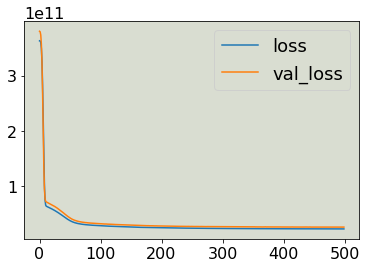

In [15]:
losses.plot()

In [16]:
y_train_pred_nn=model.predict(X_train)
y_cv_pred_nn=model.predict(X_cv)

In [17]:
print('mean sq error training data nn : ',mean_squared_error(y_train,y_train_pred_nn))
print('mean sq error cross-val data nn : ',mean_squared_error(y_cv,y_cv_pred_nn))
print()
print('mean abs error training data nn : ',mean_absolute_error(y_train,y_train_pred_nn))
print('mean abs error cross-val data nn : ',mean_absolute_error(y_cv,y_cv_pred_nn))

mean sq error training data nn :  22170211896.053974
mean sq error cross-val data nn :  25452116343.36206

mean abs error training data nn :  98367.55697680623
mean abs error cross-val data nn :  102248.56797747905


**Let's compare these results with Linear regression model**

In [18]:
print('mse(nn)/mse(LinReg) : ',mean_squared_error(y_train,y_train_pred_nn)/mean_squared_error(y_train,y_train_pred))

mse(nn)/mse(LinReg) :  0.8708227032527759


Text(0, 0.5, 'Predicted')

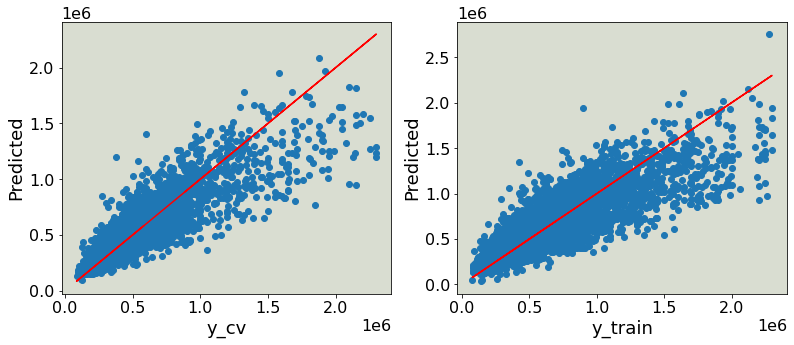

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(13,5))
ax[0].scatter(y_cv,y_cv_pred_nn)
ax[0].plot(y_cv,y_cv,'r')
ax[0].set_xlabel('y_cv')
ax[0].set_ylabel('Predicted')
ax[1].scatter(y_train,y_train_pred_nn)
ax[1].plot(y_train,y_train,'r')
ax[1].set_xlabel('y_train');ax[1].set_ylabel('Predicted')

## Test data

In [20]:
y_test_pred=linReg.predict(X_test_f)
y_test_pred_nn=model.predict(X_test_f)

In [21]:
print('mean sq error test data nn : ',mean_squared_error(y_test_f,y_test_pred_nn))
print('mean abs error test data nn : ',mean_absolute_error(y_test_f,y_test_pred_nn))
print()
print('mean sq error test data linReg : ',mean_squared_error(y_test_f,y_test_pred))
print('mean abs error test data linReg : ',mean_absolute_error(y_test_f,y_test_pred))

mean sq error test data nn :  22804143209.69095
mean abs error test data nn :  99266.40338759893

mean sq error test data linReg :  25669914072.029804
mean abs error test data linReg :  109485.88020955517


**ANN model performs marginally better than linear Regression. However 